In [2]:
import numpy as np
from numba import njit

Dabar, išsprendę vieną iš Nasa Jet Propulsion Laboratory iššūkių, jūs įsitikinote, kad greičiausias ir paprasčiausias būdas išreikšti kokio nors įvykio laiką milisekundėmis, yra paleisti šį rankomis apibrėžtą metodą:

In [113]:
@njit
def _numba_dot(arr, dimshape, len_arr, len_dimshape, su):
    for i in range(len_arr):
        for j in range(len_dimshape):
            su[i] = su[i] + arr[i][j] * dimshape[j]
        
def numba_dimreduce(arr, dimshape=None, dtype=np.int64):
    '''not safe if allocation is exceeded'''
    if dimshape is None: bounds = np.array(np.max(arr[:-1], axis=0) + 1, dtype=dtype)
    else: bounds = np.array(dimshape[:-1], dtype=dtype)
    dimshape = np.cumprod(np.insert(bounds, 0, 1))
    su = np.zeros(len(arr), dtype=dtype)
    _numba_dot(arr, dimshape, len(arr), len(dimshape), su)
    return su

Pavyzdžiui, jei duota serija įvykių, kurių laikas išreikštas milisekundėmis, sekundėmis, minutėmis, valandomis, paromis ir savaitėmis, tai užtenka paleisti `numba_dimreduce` komandą ir sužinosime visų įvykių laikus milisekundėmis:

In [114]:
X = np.array([[606,  57,   3,  10,   5, 230],
              [863,  34,   9,  18,   3, 245],
              [963,   5,  32,   7,   1, 259],
              [ 62,  11,  10,  19,   4, 231],
              [863,  34,   9,  18,   3, 245],
              [963,   5,  32,   7,   1, 259],
              [963,   5,  32,   7,   1, 259],
              [ 62,  11,  10,  19,   4, 231],
              [606,  57,   3,  10,   5, 230],
              [963,   5,  32,   7,   1, 259],
              [606,  57,   3,  10,   5, 230],
              [863,  34,   9,  18,   3, 245],
              [ 62,  11,  10,  19,   4, 231],
              [963,   5,  32,   7,   1, 259],
              [863,  34,   9,  18,   3, 245]])

numba_dimreduce(X, dimshape = np.array([1000,  60,  60,  24,   7, 300]))

array([139572237606, 148500574863, 156756725963, 140123411062,
       148500574863, 156756725963, 156756725963, 140123411062,
       139572237606, 156756725963, 139572237606, 148500574863,
       140123411062, 156756725963, 148500574863], dtype=int64)

Parašykite metodą, kuris atlieką atvirkštinį procesą: duotus milisekundžių skaičius konvertuoja į masyvą $X$

### Input

    X = np.array([51127833450, 54390276735, 57397196239, 51329295410, 54390276735, 57397196239, 57397196239, 51329295410, 
                  51127833450, 57397196239, 51127833450, 54390276735, 51329295410, 57397196239, 54390276735], dtype=int64)
    dimshape = np.array([1000,  60,  60,  24,   7, 300])

### Expected output

    np.array([[450,  33,  10,  18,   3,  84],
              [735,  36,  24,  12,   6,  89],
              [239,  56,  39,   7,   6,  94],
              [410,  15,   8,   2,   6,  84],
              [735,  36,  24,  12,   6,  89],
              [239,  56,  39,   7,   6,  94],
              [239,  56,  39,   7,   6,  94],
              [410,  15,   8,   2,   6,  84],
              [450,  33,  10,  18,   3,  84],
              [239,  56,  39,   7,   6,  94],
              [450,  33,  10,  18,   3,  84],
              [735,  36,  24,  12,   6,  89],
              [410,  15,   8,   2,   6,  84],
              [239,  56,  39,   7,   6,  94],
              [735,  36,  24,  12,   6,  89]], dtype=int64)

In [138]:
### Solutions
X = np.array([51127833450, 54390276735, 57397196239, 51329295410, 54390276735, 57397196239, 57397196239, 51329295410, 
              51127833450, 57397196239, 51127833450, 54390276735, 51329295410, 57397196239, 54390276735], dtype=np.int64)
dimshape = np.array([1000,  60,  60,  24,   7, 300])

In [120]:
@njit
def _numba_divide(arr, dimshape, len_arr, len_dimshape, result_arr):
    for i in range(len_arr):
        for j in range(len_dimshape):
            result_arr[i][j] = arr[i] % dimshape[j]
            arr[i] = arr[i] // dimshape[j]
        
def numba_dimexpand(arr, dimshape, dtype=np.int64):
    '''not safe if allocation is exceeded'''
    result_arr = np.empty((len(arr), len(dimshape)), dtype=dtype)
    _numba_divide(arr.copy(), dimshape, len(arr), len(dimshape), result_arr)
    return result_arr

In [139]:
numba_dimexpand(X, dimshape, dtype=np.uint16)

array([[450,  33,  10,  18,   3,  84],
       [735,  36,  24,  12,   6,  89],
       [239,  56,  39,   7,   6,  94],
       [410,  15,   8,   2,   6,  84],
       [735,  36,  24,  12,   6,  89],
       [239,  56,  39,   7,   6,  94],
       [239,  56,  39,   7,   6,  94],
       [410,  15,   8,   2,   6,  84],
       [450,  33,  10,  18,   3,  84],
       [239,  56,  39,   7,   6,  94],
       [450,  33,  10,  18,   3,  84],
       [735,  36,  24,  12,   6,  89],
       [410,  15,   8,   2,   6,  84],
       [239,  56,  39,   7,   6,  94],
       [735,  36,  24,  12,   6,  89]], dtype=uint16)

In [140]:
def numpy_unravel(arr, shape, dtype=np.uint16):
    columns = np.unravel_index(arr, shape, 'F')
    return np.concatenate([c.astype(dtype) for c in columns]).reshape(len(shape), -1).T
    
numpy_unravel(X, dimshape, dtype=np.uint16)

array([[450,  33,  10,  18,   3,  84],
       [735,  36,  24,  12,   6,  89],
       [239,  56,  39,   7,   6,  94],
       [410,  15,   8,   2,   6,  84],
       [735,  36,  24,  12,   6,  89],
       [239,  56,  39,   7,   6,  94],
       [239,  56,  39,   7,   6,  94],
       [410,  15,   8,   2,   6,  84],
       [450,  33,  10,  18,   3,  84],
       [239,  56,  39,   7,   6,  94],
       [450,  33,  10,  18,   3,  84],
       [735,  36,  24,  12,   6,  89],
       [410,  15,   8,   2,   6,  84],
       [239,  56,  39,   7,   6,  94],
       [735,  36,  24,  12,   6,  89]], dtype=uint16)

## Bench it
**Convert into time**

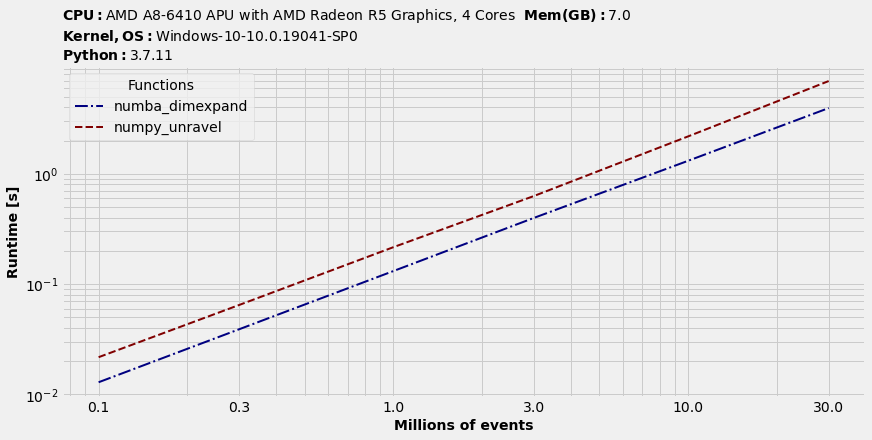

In [134]:
import benchit
%matplotlib inline
benchit.setparams(rep=1)

sizes = [100000, 300000, 1000000, 3000000, 10000000, 30000000]

N = sizes[-1]
arr = np.random.randint(int(5e10), int(6e10), size=N, dtype=np.int64)
dimshape = np.array([1000, 60, 60, 24, 7, 300])
fns = [numba_dimexpand, numpy_unravel]

in_ = {s/1000000: (arr[:s], dimshape, np.uint16) for s in sizes}
t = benchit.timings(fns, in_, multivar=True, input_name='Millions of events')
t.plot(logx=True, figsize=(12, 6), fontsize=14)

**Covert into bytes**

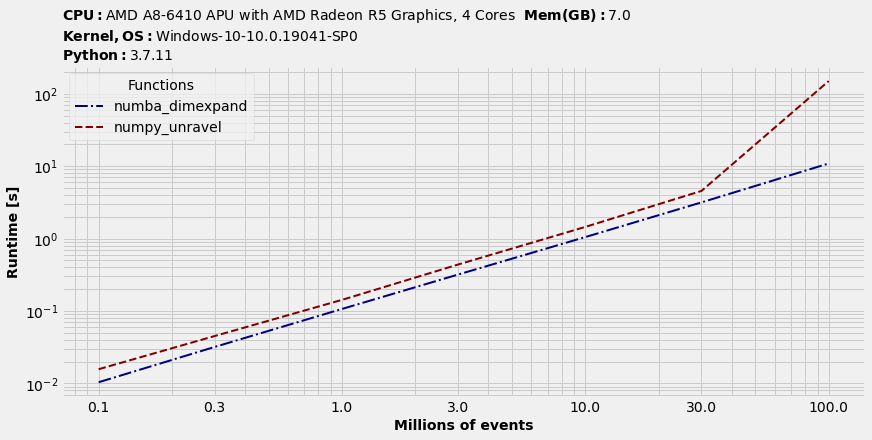

In [142]:
import benchit
%matplotlib inline
benchit.setparams(rep=1)

sizes = [100000, 300000, 1000000, 3000000, 10000000, 30000000]

N = sizes[-1]
arr = np.random.randint(int(5e10), int(6e10), size=N, dtype=np.int64)
dimshape = np.array([256,256,256,256,256])
fns = [numba_dimexpand, numpy_unravel]

in_ = {s/1000000: (arr[:s], dimshape, np.uint8) for s in sizes}
t = benchit.timings(fns, in_, multivar=True, input_name='Millions of events')
t.plot(logx=True, figsize=(12, 6), fontsize=14)